In [163]:
import numpy as np
import math
import pandas as pd
from EZReader import EZReader

from itertools import product

from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
ezreader = EZReader(corpus="datasets/1_1_corpus.txt", 
                    target="datasets/1_1_target.txt", 
                    simulation="worddvs", 
                    num_subject=1000)

In [6]:
def get_observation(metric):
    df = pd.read_csv('datasets/Eight_Metrics.csv')
    df = df[(df['file'] == 11) & (df['subject'] == 1)]

    results = [[], [], [], [], []]

    for index, row in df.iterrows():
        freq = row['freq']
        freq_class = math.floor(math.log(freq, 10)) if freq != 0 else 0
        results[freq_class].append(row[metric])

    observed = []
    for clss in results:
        observed.append(np.array(clss).mean())

    return observed

In [7]:
def mse_score(ezreader, metric, observation=None):
    if not observation: observation = get_observation(metric)
    prediction = ezreader.get_prediction(metric)
    return np.square(np.subtract(observation, prediction)).mean()

In [67]:
a1 = np.arange(150, 450, 10)
a2 = np.arange(1, 5, 0.5)
a3 = np.arange(0, 20, 4)
d = np.arange(0.1,0.6,0.1)

i = np.arange(5, 50, 10)
pf = np.arange(0.01, 0.11, 0.05)

params = product(a1, a2, a3, d, i, pf)

In [68]:
results = []

for param in tqdm(list(params)):
    ezreader.clear_params()
    a1, a2, a3, d, i, pf = param
    ezreader.set_params(a1=a1,
                       a2=a2,
                       a3=a3,
                       d=d,
                       i=i,
                       pf=pf)
    score = mse_score(ezreader, 'TT')
    results.append({tuple(param):score})

100%|██████████| 60000/60000 [11:56:30<00:00,  1.40it/s]  


In [123]:
# Test for 001 in 11

a1 = np.arange(200, 230, 5)
a2 = np.arange(4.5, 7, 0.5)
a3 = np.arange(4, 24, 4)
d = np.arange(0.1,0.6,0.1)

i = np.arange(25, 40, 5)
pf = [0.06]

params = product(a1, a2, a3, d, i, pf)

In [121]:
len(list(params))

2250

In [124]:
results_test = []

for param in tqdm(list(params)):
    ezreader.clear_params()
    a1, a2, a3, d, i, pf = param
    ezreader.set_params(a1=a1,
                       a2=a2,
                       a3=a3,
                       d=d,
                       i=i,
                       pf=pf)
    score = mse_score(ezreader, 'TT')
    results_test.append({tuple(param):score})

100%|██████████| 2250/2250 [6:26:13<00:00, 10.30s/it]      


In [125]:
sorted([list(result.items()) for result in results_test], key=lambda x: x[0][1])[:10]

[[((210, 6.5, 12, 0.5, 35, 0.06), 371.43494574437307)],
 [((225, 6.5, 4, 0.30000000000000004, 35, 0.06), 377.1402534478497)],
 [((215, 6.5, 4, 0.4, 35, 0.06), 381.32679706923716)],
 [((210, 6.5, 20, 0.5, 35, 0.06), 383.9458727047992)],
 [((210, 6.5, 16, 0.5, 30, 0.06), 389.72833974937384)],
 [((220, 6.5, 4, 0.30000000000000004, 25, 0.06), 394.20352859207725)],
 [((215, 6.0, 20, 0.4, 25, 0.06), 397.7152211963714)],
 [((225, 6.5, 20, 0.30000000000000004, 35, 0.06), 397.76661749502443)],
 [((215, 6.5, 8, 0.5, 25, 0.06), 410.247637779575)],
 [((220, 6.5, 8, 0.4, 30, 0.06), 410.5719338656819)]]

In [137]:
a1, a2, a3, d, i, pf = 225, 6.5, 4, 0.30000000000000004, 35, 0.06


ezreader.set_params(a1=a1,
                       a2=a2,
                       a3=a3,
                       d=d,
                       i=i,
                       pf=pf)
score = mse_score(ezreader, 'TT')
pred = ezreader.get_prediction('TT')
score

461.9333519230478

In [107]:
results[:3]

sorted([list(result.items()) for result in results], key=lambda x: x[0][1])[:10]

[[((200, 4.5, 16, 0.4, 5, 0.060000000000000005), 580.010775732125)],
 [((210, 4.5, 16, 0.30000000000000004, 45, 0.060000000000000005),
   600.2262578032104)],
 [((230, 4.5, 0, 0.1, 5, 0.060000000000000005), 637.0711490942311)],
 [((210, 4.5, 0, 0.30000000000000004, 5, 0.060000000000000005),
   638.8503148082846)],
 [((190, 4.5, 16, 0.5, 45, 0.060000000000000005), 648.7092682635846)],
 [((220, 4.5, 8, 0.2, 15, 0.060000000000000005), 652.2872481069602)],
 [((230, 4.5, 0, 0.1, 35, 0.060000000000000005), 652.569818959105)],
 [((230, 4.5, 4, 0.1, 45, 0.060000000000000005), 655.4575419581961)],
 [((190, 4.5, 0, 0.5, 45, 0.060000000000000005), 659.1719456769622)],
 [((220, 4.5, 12, 0.2, 35, 0.060000000000000005), 661.5793699824771)]]

In [112]:
a1, a2, a3, d, i, pf = 220, 4.5, 12, 0.2, 35, 0.060000000000000005


ezreader.set_params(a1=a1,
                       a2=a2,
                       a3=a3,
                       d=d,
                       i=i,
                       pf=pf)
score = mse_score(ezreader, 'TT')

In [113]:
score

721.9585306230672

In [116]:
pred = ezreader.get_prediction('TT')

In [54]:
a1 = np.arange(220, 340, 10)

for a1 in a1:
    ezreader.clear_params()
    ezreader.set_params(a1=a1)
    print(mse_score(ezreader, 'TT'))

1487.6837129520352
1805.826199196828
2507.2494846679183
3773.8106584659204
5201.541433272173
7489.540625917197
9788.84232382181
12660.419251559162
16424.63952103037
20225.769490380877
24103.563705008422
27991.725239254203


In [35]:
ezreader.get_prediction('TT')

[316.8095238095238,
 276.7142857142857,
 263.84,
 241.41463414634146,
 223.9512195121951]

In [36]:
mse_score(ezreader, 'TT')

22890.071412114026

In [37]:
get_observation('TT')

[533.5384615384615, 464.5, 376.57142857142856, 359.825, 307.1111111111111]

In [64]:
len(list(params))

9000000

In [58]:
ezreader.set_params(a1=220)

In [59]:
mse_score(ezreader, 'TT')

1283.4417048892142

In [60]:
pred = ezreader.get_prediction('TT')

In [61]:
obs = get_observation('TT')

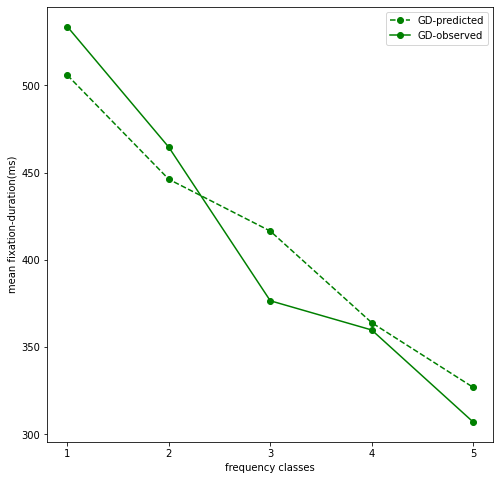

In [138]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))

freq_class = [1, 2, 3, 4, 5]

ax.plot(freq_class, pred, linestyle="--", marker='o', color="g",  label="GD-predicted")
ax.plot(freq_class, obs, linestyle="-", marker='o', color="g", label="GD-observed")

ax.set_xlabel("frequency classes")
ax.set_ylabel("mean fixation-duration(ms)")


ax.xaxis.set_major_locator(MaxNLocator(integer=True))


#plt.style.use('fivethirtyeight')
# plt.ylim([210,390])
# #plt.xlim([0,6])
ax.legend()
# plt.rcParams.update({'font.size': 12})


plt.show()




### 314

In [139]:
def get_observation(metric):
    df = pd.read_csv('datasets/Eight_Metrics.csv')
    df = df[(df['file'] == 11) & (df['subject'] == 314)]

    results = [[], [], [], [], []]

    for index, row in df.iterrows():
        freq = row['freq']
        freq_class = math.floor(math.log(freq, 10)) if freq != 0 else 0
        results[freq_class].append(row[metric])

    observed = []
    for clss in results:
        observed.append(np.array(clss).mean())

    return observed

In [140]:
ezreader314 = EZReader(corpus="datasets/1_1_corpus.txt", 
                    target="datasets/1_1_target.txt", 
                    simulation="worddvs", 
                    num_subject=1000)

In [151]:
a1 = np.arange(150, 450, 10)
a2 = np.arange(3, 7, 0.5)
a3 = np.arange(0, 20, 8)
d = np.arange(0.1,0.6,0.2)

i = np.arange(5, 50, 10)
pf = np.arange(0.01, 0.11, 0.05)

params = product(a1, a2, a3, d, i, pf)

In [152]:
results314 = []

for param in tqdm(list(params)):
    ezreader314.clear_params()
    a1, a2, a3, d, i, pf = param
    ezreader314.set_params(a1=a1,
                       a2=a2,
                       a3=a3,
                       d=d,
                       i=i,
                       pf=pf)
    score = mse_score(ezreader314, 'TT')
    results314.append({tuple(param):score})

100%|██████████| 21600/21600 [4:13:04<00:00,  1.42it/s]  


In [144]:
ezreader314.get_prediction('TT')

[316.6190476190476,
 280.7857142857143,
 260.48,
 240.4390243902439,
 222.0487804878049]

In [154]:
sorted([list(result.items()) for result in results314], key=lambda x: x[0][1])[:10]

[[((220, 6.5, 0, 0.5000000000000001, 45, 0.060000000000000005),
   1239.5927453891)],
 [((220, 6.0, 8, 0.5000000000000001, 45, 0.060000000000000005),
   1241.1722048234806)],
 [((250, 6.5, 8, 0.1, 25, 0.060000000000000005), 1255.661299010737)],
 [((220, 6.5, 8, 0.5000000000000001, 45, 0.060000000000000005),
   1256.6331050914614)],
 [((230, 6.0, 16, 0.30000000000000004, 45, 0.060000000000000005),
   1275.1767171829697)],
 [((220, 6.5, 8, 0.5000000000000001, 5, 0.060000000000000005),
   1277.240334423125)],
 [((220, 6.0, 16, 0.5000000000000001, 45, 0.060000000000000005),
   1287.183732325994)],
 [((260, 6.5, 8, 0.1, 15, 0.060000000000000005), 1300.215552024904)],
 [((250, 6.5, 0, 0.1, 35, 0.060000000000000005), 1308.439588739176)],
 [((240, 6.5, 8, 0.30000000000000004, 5, 0.060000000000000005),
   1316.0395936777586)]]

In [162]:
np.mean([np.array([[1,2],[3,4]]), np.array([[2,4],[6,8]])], axis=0)

array([[1.5, 3. ],
       [4.5, 6. ]])

In [171]:
ezreader.generate_prediction(4)

,SFD,FFD,GD,TT,PrF,Pr1,Pr2,PrS,token,s
0,298.50,296.25,314.00,326.50,0.9425,0.8350,0.0800,0.0850,the,1
1,323.25,300.00,362.00,406.50,0.9950,0.7625,0.2275,0.0100,place,1
2,296.00,294.50,323.50,353.50,0.9300,0.7450,0.1025,0.1525,for,1
3,261.25,270.50,291.25,314.00,0.6950,0.5975,0.0525,0.3500,a,1
4,335.25,303.00,469.25,557.25,0.9925,0.5025,0.4875,0.0100,snark,1
...,...,...,...,...,...,...,...,...,...,...
144,312.25,311.75,319.00,332.75,0.8325,0.7375,0.0275,0.2350,he,1
145,267.25,277.25,331.75,374.25,0.9625,0.7300,0.1900,0.0800,had,1
146,364.25,321.25,428.50,489.50,0.9925,0.6550,0.3275,0.0175,bought,1
147,298.50,293.75,315.00,346.75,0.9175,0.7675,0.0800,0.1525,for,1
